>[Actividad 5](#scrollTo=3a6dc6a1)

>>[primera parte - Hallar ceros de raices por medio del método de la bisección, el método de newton](#scrollTo=iQwcTUQD4zJA)

>>>[método de la bisección](#scrollTo=yH7x7UM-V6il)

>>>[método de newton](#scrollTo=KGgiFbY9V-T9)

>>>[método del punto fijo](#scrollTo=3fne6dMTWQmN)

>>[problema 'fixed point methods'](#scrollTo=qgIhRBI-WedM)

>>>[primer intento con correciones (mirar solo el bloque de celdas de abajo)](#scrollTo=rmLostDij-uK)

>>>[solucion](#scrollTo=uLtpYM47kECg)



<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
Métodos computacionales para físicos  y astrónomos

Universidad de Antioquia

Prof: Hernan D. Salinas Jiménez

Ref: https://github.com/restrepo/ComputationalMethods

##primera parte - Hallar ceros de raices por medio del método de la bisección, el método de newton


In an IPython notebook, use the scipy implementation and find the first solution to the equation, write a function with the bisection methods.

What is the solution if a=1, and b=1, what is the solution if a=2 and b=2
  
1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $
   



  
 2. $a e^{x}-2= b\cos(e^x-2)$

In [ ]:
#scipy.optimize.bisect recibe como argumentos funcion, escalar a, escalar b
#regresa un cero de la funcion entre el intervalo a y b
#xtol es el epsilon --> la tolerancia

from scipy import optimize    #cuando llamo algo de aqui pongo solamente optimize
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def func_1(x,a,b):                                 #estos valores de a y b no tienen nada que ver con el intervalo de definicion
  return a * np.sqrt(x**2 + 1) + b * np.exp(x) * np.sin(x) -7

def func_2(x,a,b):
  return a* np.exp(x) - 2 - b * np.cos(np.exp(x) - 2)

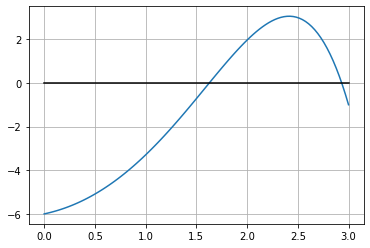

In [ ]:
#gráfica de la primera función sobre los parámetros (1,1)

x = np.linspace(0,3,100)
ceros= np.zeros(100)
params= (1,1)
valores= func_1(x, *params)    #una forma mas elegante de entregarle a la funcion el resto de los parámetros
plt.plot(x, valores)   #gráfica de la primera funciín para los parámtros 1,1
plt.plot(x, ceros, 'k')
plt.grid()

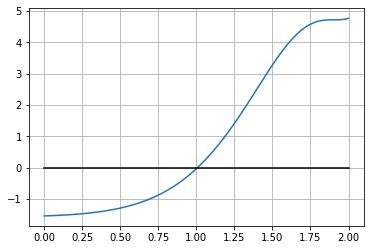

In [ ]:
#gráfica de la segunda función sobre los parámetros (1,1)

x= np.linspace(0,2, 100)
ceros= np.zeros(100)
params = (1,1)
valores= func_2(x, *params)
plt.plot(x, valores)
plt.plot(x, ceros, 'k')
plt.grid()

###método de la bisección

In [ ]:
#miramos primero para la funcion 1

int_1= optimize.bisect(func_1, 1, 2, args=(1,1))      #args son los argumentos asociados a la funcion, se ponen los que son aparte de la x, es decir, a y b en este caso

int_2= optimize.bisect(func_1, 3,5, args=(2,2))          #en args puedo poner params

int_1, int_2

(1.628718494926943, 3.1323505942436896)

In [ ]:
#ahora, para el caso de la funcion 2

int_3 = optimize.bisect(func_2, 1,2, args=(1,1))
int_4 = optimize.bisect(func_2, -1,1, args=(2,2))

int_3, int_4

(1.0076239716563578, 0.6931471805601177)

In [ ]:
#otra forma para trabajar con el metodo de la biseccion es 
from scipy.optimize import bisect

#se llama escribiendo bisect

In [ ]:
#bisect?     -> asi miro la documentacion

Vamos ahora a analizar estas mismas dos funciones con el método de newton
[documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

In [ ]:
def f_1(x,a,b):                                 #estos valores de a y b no tienen nada que ver con el intervalo de definicion
  return a * np.sqrt(x**2 + 1) + b * np.exp(x) * np.sin(x) -7

def f_2(x,a,b):
  return a* np.exp(x) - 2 - b * np.cos(np.exp(x) - 2)

###método de newton

In [ ]:
#para obtener las raices por medio del metodo de newton, debemos calcular las derivadas

def prime_1(x,a,b):
  return (a * x / np.sqrt(x ** 2 + 1)) + (b * np.exp(x) *np.sin(x)) + (b * np.exp(x) * np.cos(x))

def prime_2(x,a,b):
  return (a* np.exp(x)) + (b * np.sin(np.exp(x) - 2) * np.exp(x))

In [ ]:
import sympy as sp

x= sp.symbols('x')
a= sp.symbols('a')
b= sp.symbols('b')


def func_1(x,a,b):                                 #estos valores de a y b no tienen nada que ver con el intervalo de definicion
  return a * sp.sqrt(x**2 + 1) + b * sp.exp(x) * sp.sin(x) -7

def func_2(x,a,b):
  return a* sp.exp(x) - 2 - b * sp.cos(sp.exp(x) - 2)


derivada_1= sp.diff(func_1(x,a,b), x)       #me calcula la derivada con respecto a x
derivada_2= sp.diff(func_2(x,a,b), x)

derivada_1

a*x/sqrt(x**2 + 1) + b*exp(x)*sin(x) + b*exp(x)*cos(x)

In [ ]:
der_1= sp.lambdify((x,a,b), derivada_1, 'numpy')
der_2 = sp.lambdify((x,a,b), derivada_2, 'numpy')


der_1(1,1,1), prime_1(1,1,1), der_2(1,1,1), prime_2(1,1,1)   #comparo el resultado que me da con la derivada que me arroja sympy con la que he definido a mano

(4.463156008281275, 4.463156008281275, 4.507161266827183, 4.507161266827183)

In [ ]:
#miramos las dos primeras raices para la primera funcion, cambiando los valores de a y b

r_1 = optimize.newton(f_1, 2, der_1,  args = (1,1))
r_2 = optimize.newton(f_1, 4, der_1,  args = (2,2))

r_1, r_2

(1.6287184949270082, 3.1323505942423657)

In [ ]:
#veamos ahora las raices para la segunda función

r_3 = optimize.newton(f_2, 1.5, der_2, args=(1,1))
r_4 = optimize.newton(f_2, 1, der_2, args=(2,2))

r_3, r_4

(1.0076239716581368, 0.6931471805599454)

Observamos que por medio del método de newton, obtenemos las mismas raices que las que obtuvimos por medio del método de la bisección. 

Es importante tener en cuenta que con este método es importnate pasar el valor de la derivada. Si no se pasa al derivada, entonces estaríamos usando el método de la secante( que es diferente)

Ahora bien, para realizarlo por medio del método de la secante, es necesario tener en cuenta dos puntos (en caso de que no se conozca la derivada de la funcion).

Si se conoce la derivada, entonces se puede entregar un solo punto

In [ ]:
optimize.root_scalar?

###método del punto fijo

Ahora, vamos a verlo por medio del método del punto fijo [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)

In [ ]:
#en este caso, definimos la funcion x - f(x)

def f_1(x,a,b):                                 #estos valores de a y b no tienen nada que ver con el intervalo de definicion
  return a * np.sqrt(x**2 + 1) + b * np.exp(x) * np.sin(x) -7

def f_2(x,a,b):
  return a* np.exp(x) - 2 - b * np.cos(np.exp(x) - 2)

def g_1(x,a,b):
  return x - f_1(x,a,b)

def g_2(x,a,b):
  return x - f_2(x,a,b)

In [ ]:
r_1, r_2 = optimize.fixed_point(g_1, 1.5, args=(1,1)), optimize.fixed_point(g_1, 3.2, args=(2,2))

print(f'la raiz cuando a=b=1 es {r_1}')
print(f'la raiz cuando a=b=2 es {r_2}')

la raiz cuando a=b=1 es 1.6287184949270082
la raiz cuando a=b=2 es 3.1323505942423666


In [ ]:
r_3, r_4 = optimize.fixed_point(g_2, 1, args=(1,1) ), optimize.fixed_point(g_2, 0.6, args=(2,2) )

print(f'la raiz cuando a=b=1 es {r_3}')
print(f'la raiz cuando a=b=2 es {r_4}')

la raiz cuando a=b=1 es 1.0076239716581368
la raiz cuando a=b=2 es 0.6931471805599453


In [ ]:
#también podemos ingresar los parámetros de esta forma:

param= ( 1,1)
optimize.fixed_point(g_1, 1.5, param)

array(1.62871849)

In [ ]:
params=(1,1)
params2=(2,2)
def test(x, a, b, c, d):
  return a*x+b

test(1, *params, *params2)

2

In [ ]:
params=(1,1)
def test(x, tuple_):
  a=tuple_[0]
  b=tuple_[1]
  return a*x+b

test(1, params)

2

##problema 'fixed point methods'

3. Fixed point methods. 

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

###primer intento con correciones (mirar solo el bloque de celdas de abajo)

In [ ]:
#comenzamos por definir las cantidades que necesitaremos usar:

import numpy as np
import matplotlib.pyplot as plt

pi= np.pi
L=6500e3             #m
rho = 18000          #kg / m**3
rho_= 5520           #kg / m**3
r_tierra= 6371e3     #m
m_tierra = 5.972e24  #kg


#MUY IMPORTANTE TENER EN CUENTA LAS UNIDADES AL MOMENTO DE OPERAR

In [ ]:
#ahora, defino la funcion que depende de R, y a la cual deseo encontrarle los ceros

def func(R):
  m_g= (1.75 * r_tierra)** 3 * 4 * pi * rho_ / 3
  m= 4 * pi * rho * (2 * L**3 + (-2 * L**3 - 2 * L**2 * R - L * R**2)* np.exp(-R/L)) 
  
  t_f= m_g - m

  return t_f

#esta es la expresión que se obtuvo del proceso de integración manual

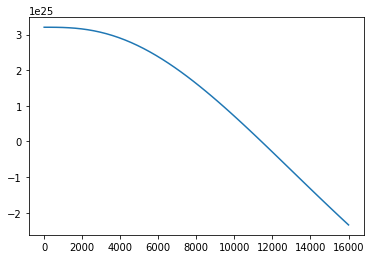

In [ ]:
#ahora, vamos a graficar algunos puntos de la función, para darnos la idea del lugar en el cual se puede encontrar la raiz

x= np.linspace(1, 16000e3)
y= func(x)

plt.plot(x/1e3, y);

In [ ]:
#AL REALIZAR LAS RESPECTIVAS CORRECIONES, PUDIMOS OBTENER EL GRÁFICO QUE ERA ESPERADO

###solucion 

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
#defino los simbolos que ingesaré a la integral de sympy - o a las operaciones en general de sympy

r= sp.symbols('r')
R= sp.symbols('R')
L=sp.symbols('L')
rho0= sp.symbols('rho0')

In [ ]:
#defino M, tal que es la función que deseo integrar

inte = sp.integrate( rho0 * sp.exp(-r/L) * r**2 , (r, 0, R))    #hacemos que la integral me la resuleva definida (que evalúe r entre o y R)
inte

2*L**3*rho0 + (-2*L**3*rho0 - 2*L**2*R*rho0 - L*R**2*rho0)*exp(-R/L)

In [ ]:
M= 4 * sp.pi * inte
M

4*pi*(2*L**3*rho0 + (-2*L**3*rho0 - 2*L**2*R*rho0 - L*R**2*rho0)*exp(-R/L))

In [ ]:
#defino la funcion de la masa, con base al resultado que me entrega sympy

def masa(R, L, rho0):
  return 4 * np.pi * rho * (2*L**3 + (-2 * L**3 - 2* L**2 * R - L * R**2) * np.exp(-R/L))

#defino ahora la función de la masa del planeta, de acuerdo con la ecuación que es presentada en el problema

def masa_g(r_t, rho_):
  return (1.75 * r_t)**3 * 4 * np.pi * rho_ / 3

In [ ]:
#defino las cantidades que voy a necesitar reemplazar

L=6500e3             #m
rho = 18000          #kg / m**3
rho_= 5520           #kg / m**3
r_tierra= 6371e3     #m
m_tierra = 5.972e24  #kg

In [ ]:
#defino la funcion que necesito --> depende de los diferentes valores de R

def fun(R, r_tierra, rho_, L, rho):
  return  masa_g(r_tierra, rho_) - masa(R, L, rho)

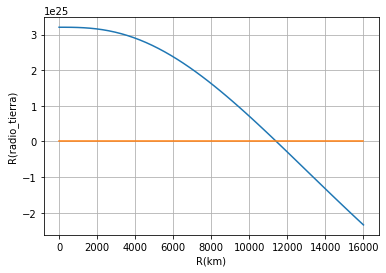

In [ ]:
R = np.linspace(1, 16000e3)   #valores del eje x
y= fun(R, r_tierra, rho_, L, rho)
y_o= np.zeros(50)

plt.plot(R/1e3, y)              #como arriba todo fué trabajado en metros, convierto a kilómetros para graficar
plt.grid()
plt.plot(R/1e3, y_o)
plt.xlabel('R(km)')
plt.ylabel('R(radio_tierra)');

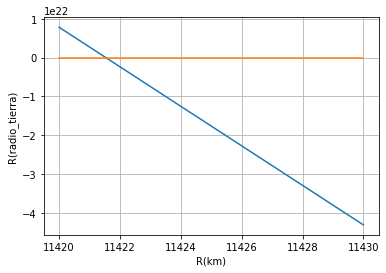

In [ ]:
#hacemos mas zoom al gráfico para tomar un punto cercano

R = np.linspace(11420e3, 11430e3)   #valores del eje x
y= fun(R, r_tierra, rho_, L, rho)
y_o= np.zeros(50)

plt.plot(R/1e3, y)              #como arriba todo fué trabajado en metros, convierto a kilómetros para graficar
plt.grid()
plt.plot(R/1e3, y_o)
plt.xlabel('R(km)')
plt.ylabel('R(radio_tierra)');

In [ ]:
#aplicamos el método de la bisección para determinar el cero de la función

from scipy import optimize

raiz= optimize.bisect(fun, 11420e3, 11422e3, args=(r_tierra, rho_, L, rho))

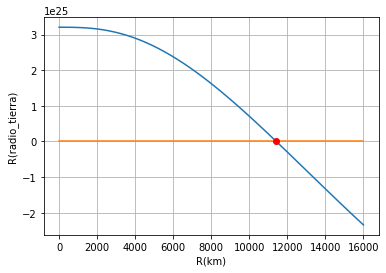

In [ ]:
#graficamos la raiz

R = np.linspace(1, 16000e3)   
y= fun(R, r_tierra, rho_, L, rho)
y_o= np.zeros(50)

plt.plot(R/1e3, y)              
plt.grid()
plt.plot(R/1e3, y_o)
plt.plot(raiz/1e3, fun(raiz, r_tierra, rho_, L, rho), 'ro')
plt.xlabel('R(km)')
plt.ylabel('R(radio_tierra)');

In [ ]:
print(f'el radio del planeta, calculado por medio de la fórmula que se pide es {round(raiz / 1e3 , 3)} km')

el radio del planeta, calculado por medio de la fórmula que se pide es 11421.532 km
